# MEGALINE

## Descripción

La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. 

Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Como Data Scientist, me han dado acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos con la finalidad de crear un modelo que me permita elegir el plan correcto. 

Desarrollaré un modelo con la mayor exactitud posible. Para este proyecto, el umbral de exactitud será del 0.75

## Objetivo

Desarrollar un modelo de clasificación con un umbral de exactitud de 0.75 que sirva para analizar el comportamiento de los clientes y recomendar alguno de los planes que Megaline ofrece actualmente.

## Carga de datos y librerías

In [1393]:
# Cargaré todas las librerías que necesito.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [1394]:
# Cargaré los datos del nuevo dataset.
users_behavior = pd.read_csv('/Users/brisna/github_projects/tripleten/megaline_sprint_9/users_behavior.csv')
users_behavior

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


## Preparación de datos

In [1395]:
# Revisaré el tipo de datos que tengo y los posibles datos ausentes.
users_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [1396]:
# Veré la descripción de cada columna.
users_behavior.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [1397]:
users_behavior.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

La descripción de los datos es la siguiente:

    * сalls — número de llamadas
    * minutes — duración total de la llamada en minutos
    * messages — número de mensajes de texto
    * mb_used — Tráfico de Internet utilizado en MB
    * is_ultra — plan para el mes actual (Ultra - 1, Smart - 0)


NOTAS:

Puerdo observar que:

1.  Hay 3,214 filas.
   
2.  En promedio, los usuarios:
   * Realizaron 63 llamadas.
   * Utilizaron 438.21 minutos.
   * Enviaron 38 mensajes.
   * Usaron 17,207.67 MB
   * Usan el plan Ultra en un 30.65%

3. Hay valores mínimos de cero en varias columnas así que revisaré esto.
   
4. Debo cambiar los tipos de datos de las columnas 'calls' y 'messages'.
   
5. Crearé una nueva la columna haciendo la conversión de 'mb_used' a GB.

In [1398]:
# Revisaré los valores únicos de la columna 'calls'.
users_behavior['calls'].unique()

array([ 40.,  85.,  77., 106.,  66.,  58.,  57.,  15.,   7.,  90.,  82.,
        45.,  51.,  56., 108.,   6.,   2.,  26.,  79.,  49.,  93.,  48.,
        11.,  53.,  81., 154.,  37.,  50.,  41.,  10.,  71.,  65., 110.,
       120.,  76.,  64.,  23.,  34.,  98.,  35.,   5.,  70., 124., 129.,
        67.,   0.,  13.,  68.,  91., 121., 114., 125.,  80.,  33., 138.,
        84.,  78.,  69.,  63.,  72.,  73.,   1.,  43., 118.,  74.,  83.,
       141., 117.,  54., 101.,  29.,   3., 107.,  55.,  47., 158.,  87.,
        28.,  59.,  52.,  44.,  17., 111., 109.,  14.,  92.,  94.,  46.,
       133.,  75.,  38.,  60., 100.,  31.,  61.,  89.,  27., 196.,  24.,
        99.,  62., 162., 116., 123.,  18.,  21.,  12.,  86.,  32.,  95.,
        39.,  30.,  25.,  36.,  42., 113.,   9., 183., 156., 127.,  96.,
        16.,   4., 102.,  97.,  20., 104., 144.,  19., 132., 131., 136.,
        88., 115., 176., 160., 164., 169.,  22., 105., 152., 177., 161.,
       112.,   8., 126., 178., 103., 130., 198., 11

In [1399]:
# Revisaré los valores únicos de la columna 'messages'.
users_behavior['messages'].unique()

array([ 83.,  56.,  86.,  81.,   1.,  21.,  20.,   6.,   3.,  38.,  13.,
        61.,  16.,   0.,   4.,  90.,  31.,  97.,  66.,  19.,  30.,  52.,
        48.,  44.,  27.,   7.,   9.,  43.,  33.,  34.,  10., 106.,  65.,
        17.,  11.,  29.,  75.,  47.,  49.,  64., 144.,  99.,  46.,  24.,
        22.,  55.,   8.,  93., 153.,  37.,  69.,  18.,  78.,  42.,  82.,
        62.,  40.,  57.,  60.,  58., 123.,  26.,  51., 109.,   5.,  39.,
        35.,  79.,  12., 182.,  36., 126.,  59., 102.,  14., 133., 110.,
        54.,  72., 103.,  23., 108.,  92.,  73.,  15.,  25.,  91., 113.,
       105.,  85., 191.,  32.,  50., 145.,  41., 150.,  53., 171., 176.,
        68.,  28.,  76.,  71., 118.,  63., 132.,  84.,   2.,  67., 111.,
       101.,  96., 112.,  95.,  89., 143.,  45.,  70.,  77.,  94., 137.,
       107.,  98., 141., 124., 129., 114.,  87.,  80., 117., 138., 142.,
       134., 128., 180., 115., 154.,  74., 185., 121., 127., 116.,  88.,
       140., 201., 100., 169., 155., 135., 151., 13

In [1400]:
# Revisaré que no haya filas con valor cero en las columnas de consumo ('calls, 'minutes', 'messages' y 'mb_used').
filtered_df = users_behavior[(users_behavior['calls'] == 0) & (users_behavior['minutes'] == 0) & (users_behavior['messages'] == 0) & (users_behavior['mb_used'] == 0)]
filtered_df

,calls,minutes,messages,mb_used,is_ultra


In [1401]:
# Convertiré 'calls' y 'messages' a tipo de datos 'int'.
users_behavior['calls'] = users_behavior['calls'].astype(int)
users_behavior['messages'] = users_behavior['messages'].astype(int)

In [1402]:
# Crearé una nueva columna con la conversión de 'mb_used' a GB.
users_behavior['gb_used'] = (users_behavior['mb_used']/1024).round(2)
users_behavior

,calls,minutes,messages,mb_used,is_ultra,gb_used
0,40,311.90,83,19915.42,0,19.45
1,85,516.75,56,22696.96,0,22.16
2,77,467.66,86,21060.45,0,20.57
3,106,745.53,81,8437.39,1,8.24
4,66,418.74,1,14502.75,0,14.16
...,...,...,...,...,...,...
3209,122,910.98,20,35124.90,1,34.30
3210,25,190.36,0,3275.61,0,3.20
3211,97,634.44,70,13974.06,0,13.65
3212,64,462.32,90,31239.78,0,30.51


In [1403]:
# Revisare los duplicados.
users_behavior[users_behavior.duplicated()]

,calls,minutes,messages,mb_used,is_ultra,gb_used


## Modelos de clasificación

In [1404]:
#  Dividiré los datos para entrenar el modelo. Un 20% será para entrenamiento y un 25% para validación. 
train_complete, test = train_test_split(users_behavior, test_size = 0.2,random_state=12345)
train, validation = train_test_split(train_complete, test_size = 0.25,random_state=12345)

In [1405]:
# Declararé variables para las características y para la característica objetivo.
features_train = train.drop(['is_ultra','mb_used'], axis=1)
target_train = train['is_ultra']

features_test = test.drop(['is_ultra','mb_used'], axis=1)
target_test = test['is_ultra']

features_valid = validation.drop(['is_ultra','mb_used'], axis=1)
target_valid = validation['is_ultra']

### Decision Tree Classifier

In [1406]:
# Crearé un bucle para obtener una profundidad de 1 a 10.
best_score_tree = 0
best_depth = 0

for depth in range(1, 11):
    model_1_decision_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_1_decision_tree.fit(features_train, target_train)
    
    train_score_tree = model_1_decision_tree.score(features_train, target_train)
    test_score_tree = model_1_decision_tree.score(features_test, target_test)
    validation_score_tree = model_1_decision_tree.score(features_valid, target_valid)
    
    print("Max_depth igual a", depth)
    print("Conjunto de entrenamiento:", train_score_tree)
    print("Conjunto de prueba:", test_score_tree)
    print("Conjunto de validación:", validation_score_tree)
    print()
    
    if validation_score_tree > best_score_tree:
        best_score_tree = validation_score_tree
        best_depth = depth

print(f"Mejor max_depth: {best_depth}, con mejor score en validación: {best_score_tree}")

Max_depth igual a 1
Conjunto de entrenamiento: 0.758298755186722
Conjunto de prueba: 0.7480559875583204
Conjunto de validación: 0.7402799377916018

Max_depth igual a 2
Conjunto de entrenamiento: 0.79201244813278
Conjunto de prueba: 0.7838258164852255
Conjunto de validación: 0.7589424572317263

Max_depth igual a 3
Conjunto de entrenamiento: 0.8117219917012448
Conjunto de prueba: 0.7869362363919129
Conjunto de validación: 0.7667185069984448

Max_depth igual a 4
Conjunto de entrenamiento: 0.8205394190871369
Conjunto de prueba: 0.7869362363919129
Conjunto de validación: 0.7651632970451011

Max_depth igual a 5
Conjunto de entrenamiento: 0.8272821576763485
Conjunto de prueba: 0.7884914463452566
Conjunto de validación: 0.7589424572317263

Max_depth igual a 6
Conjunto de entrenamiento: 0.8335062240663901
Conjunto de prueba: 0.7791601866251944
Conjunto de validación: 0.7573872472783826

Max_depth igual a 7
Conjunto de entrenamiento: 0.8506224066390041
Conjunto de prueba: 0.7884914463452566
Conj

HALLAZGOS:

Para este modelo, la profundidad del árbol de decisión óptima es de 7:

* Conjunto de entrenamiento: 0.7884914463452566

* Conjunto de validación: 0.776049766718507

### Random Forest

In [1407]:
# Crearé un bucle para obtener hasta 100 árboles, probando de 10 en 10.
best_score_random = 0
best_est = 0
for est in range(1, 10):
    model_2_random_forest = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_2_random_forest.fit(features_train, target_train)
    
    train_score_random = model_2_random_forest.score(features_train, target_train)
    test_score_random = model_2_random_forest.score(features_test, target_test)
    validation_score_random = model_2_random_forest.score(features_valid, target_valid)
    
    print("n_estimators igual a", est)
    print("Conjunto de entrenamiento:", train_score_random)
    print("Conjunto de prueba:", test_score_random)
    print("Conjunto de validación:", validation_score_random)
    print()
    
    if validation_score_random > best_score_random:
        best_score_random = validation_score_random  # Actualiza el mejor score
        best_est = est  # Guarda el n_estimators asociado

print(f"Mejor n_estimators: {best_est}, con mejor score en validación: {best_score_random}")

n_estimators igual a 1
Conjunto de entrenamiento: 0.9045643153526971
Conjunto de prueba: 0.7247278382581649
Conjunto de validación: 0.7340590979782271

n_estimators igual a 2
Conjunto de entrenamiento: 0.9123443983402489
Conjunto de prueba: 0.7558320373250389
Conjunto de validación: 0.7636080870917574

n_estimators igual a 3
Conjunto de entrenamiento: 0.9564315352697096
Conjunto de prueba: 0.7744945567651633
Conjunto de validación: 0.7651632970451011

n_estimators igual a 4
Conjunto de entrenamiento: 0.9491701244813278
Conjunto de prueba: 0.7589424572317263
Conjunto de validación: 0.7729393468118196

n_estimators igual a 5
Conjunto de entrenamiento: 0.970954356846473
Conjunto de prueba: 0.7651632970451011
Conjunto de validación: 0.7713841368584758

n_estimators igual a 6
Conjunto de entrenamiento: 0.9657676348547718
Conjunto de prueba: 0.7636080870917574
Conjunto de validación: 0.7744945567651633

n_estimators igual a 7
Conjunto de entrenamiento: 0.979253112033195
Conjunto de prueba: 0

HALLAZGOS:

Para este modelo el mejor estimador es de 9:

* Conjunto de prueba: 0.7667185069984448

* Conjunto de validación: 0.7807153965785381

### Logistic Regression

In [1408]:
# Haré un modelo usando el parámetro solver 'liblinear'.
model_3_logistic_regression = LogisticRegression(random_state=12345, solver='liblinear')
model_3_logistic_regression.fit(features_train, target_train)
    
train_score_logistic = model_3_logistic_regression.score(features_train, target_train)
test_score_logistic = model_3_logistic_regression.score(features_test, target_test)
validation_score_logistic = model_3_logistic_regression.score(features_valid, target_valid)
    
print("Conjunto de entrenamiento:", train_score_logistic)
print("Conjunto de prueba:", test_score_logistic)
print("Conjunto de validación:", validation_score_logistic)
print()

Conjunto de entrenamiento: 0.7505186721991701
Conjunto de prueba: 0.76049766718507
Conjunto de validación: 0.7278382581648523



## Conclusiones

Con base en los resultados, Random Forest resultó ser el mejor modelo para la tarea que estoy realizando ya que cumple con el umbral de exactitud de 0.75 y proporciona las mejores métricas de rendimiento en todos los conjuntos de datos.

Sin embargo, realizaré una prueba de cordura para verificar que el modelo está funcionando correctamente.

## Prueba de Cordura

In [1409]:
# Haré predicciones en el conjunto de prueba
predictions = model_2_random_forest.predict(features_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [1410]:
# Evaluaré la distribución de dichas predicciones
unique, counts = np.unique(predictions, return_counts=True)
distribution = dict(zip(unique, counts))
print("Distribución de predicciones:", distribution)

Distribución de predicciones: {np.int64(0): np.int64(487), np.int64(1): np.int64(156)}


La predicción del modelo es de 487 instancias como No Ultra (clase 0) y 156 instancias como Ultra (clase 1).

Esto indica que hay un sesgo hacia la clase No Ultra, lo cual puede ser un reflejo de la distribución de las clases en los datos de entrenamiento.

In [1411]:
# Calcularé la matriz de confusión
conf_matrix = confusion_matrix(target_test, predictions)
print("Matriz de confusión:\n", conf_matrix)

Matriz de confusión:
 [[392  55]
 [ 95 101]]


La matriz de confusión indicó que hay:

    * 392 verdaderos negativos (correctamente clasificados como Smart).
  
    * 55 falsos positivos (incorrectamente clasificados como Ultra cuando son Smart).
  
    * 95 falsos negativos (incorrectamente clasificados como Smart cuando son Ultra).

    * 101 verdaderos positivos (correctamente clasificados como Ultra).


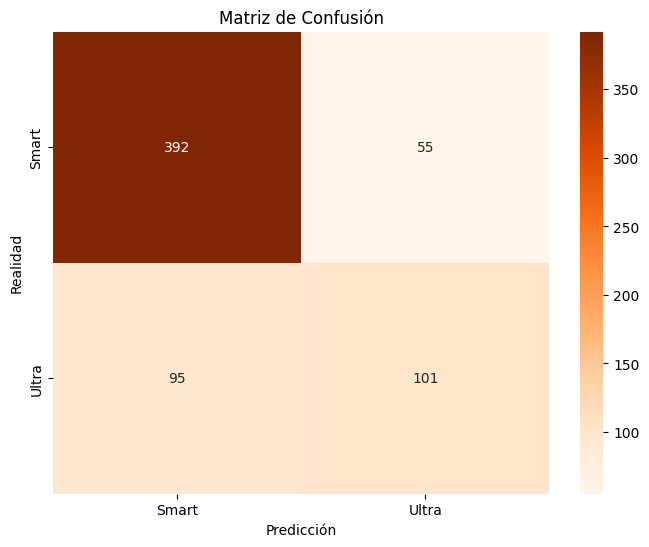

In [1412]:
# Visualizaré la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['Smart', 'Ultra'], yticklabels=['Smart', 'Ultra'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

In [1413]:
# Calcularé el reporte de clasificación
report = classification_report(target_test, predictions, target_names=['Smart', 'Ultra'])
print("Reporte de clasificación:\n", report)

Reporte de clasificación:
               precision    recall  f1-score   support

       Smart       0.80      0.88      0.84       447
       Ultra       0.65      0.52      0.57       196

    accuracy                           0.77       643
   macro avg       0.73      0.70      0.71       643
weighted avg       0.76      0.77      0.76       643




* Precision:
    - La precisión para Smart es 0.8, es decir que el 80% de las instancias predichas como Smart eran realmente Smart.
    - La precisión para Ultra es 0.65, es decir que el 65% de las instancias predichas como Ultra eran realmente Ultra.

* Recall:
    - El recall para Smart es 0.88, lo que indica que el modelo identificó correctamente el 88% de las instancias de Smart.
    - El recall para Ultra es 0.52, lo que indica que el modelo solo identificó el 52% de las instancias de Ultra.

* F1-Score:
    - El F1-score combina precisión y recall en una sola métrica. Para Smart es 0.84, y para Ultra es 0.57. Esto sugiere que el modelo tiene un buen desempeño en la clase Smart, pero el rendimiento en la clase Ultra es más bajo.

* Accuracy:
    - La precisión general del modelo es 0.77, mayor que el umbral de 0.75 que se estableció.

### Conclusión de Prueba de Cordura

1. Desbalance de clases: El modelo parece tener un buen rendimiento en la clase Smart, pero lucha con la clase Ultra. Esto podría ser un indicativo de un desbalance en los datos.

2. Ajuste de Hiperparámetros: Podría explorar otros hiperparámetros en este modelo, para mejorar la clasificación de la clase Ultra.